In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

#polskie fonty - wersja na linuxa
matplotlib.rc('font', family='DejaVu Sans') #family='Comic Sans MS'

In [2]:
more pat_data.txt

 k             n

(45, 2)
0.0739267834956 34.22699269 5.25333414052 0.000591194398114


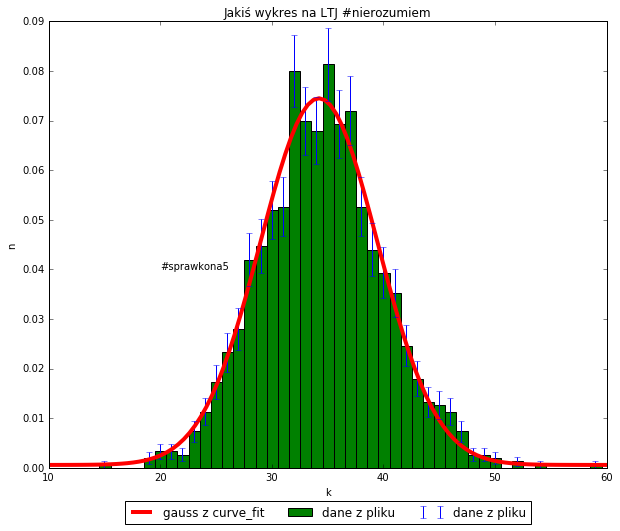

In [3]:
with open("pat_data.txt") as f:
    print(f.readline())
    tablica = np.loadtxt(f)
print(tablica.shape)
k = tablica[:,0]   #iksy w wykresie
n = tablica[:,1]   #igreki w wykresie
N = np.sum(n)
niepewnosci_n = np.sqrt(n)
n /= N
niepewnosci_n /= N         #wróćmy później do tego DLACZEGO przez N

def Gauss(x, Amplituda, Środek, Odchylenie, Stała):
    return Amplituda*np.exp(-(x-Środek)**2/2/Odchylenie**2) + Stała


#testujemy naszego gaussa
x = np.linspace(10, 60, 100)
oszacowane_parametry = 140, 25, 15, 3
y = Gauss(x, *oszacowane_parametry)


#fitujemy gaussa
parametry, niepewnosci = curve_fit(Gauss, k, n, p0 = oszacowane_parametry)
print(*parametry)   #rozpakowane parametry na gwiazdkę
y_fit = Gauss(x, *parametry)

#plotujemy
# plt.plot(x, y, label = "nasz gauss na oko")
plt.figure(figsize=(10,8))
plt.plot(x, y_fit, "r-", linewidth = 4, label = "gauss z curve_fit")
plt.bar(k-0.45, n, color='g', label = "dane z pliku", linewidth=1, width=1)
plt.errorbar(k, n, niepewnosci_n, fmt='none', markercolor='black', label ="dane z pliku")
# plt.errorbar?
plt.legend(bbox_to_anchor=(0.5,-0.1), loc='center', ncol=3) #legenda poza wykresem
plt.title("Jakiś wykres na LTJ #nierozumiem")
plt.xlabel("k")
plt.ylabel("n")
plt.text(20,0.04, "#sprawkona5")
plt.savefig("wykres_ltj.png")
plt.show()
#plt.legend?  <----dokumentacja!!!! :)

[ 110.89017846   34.22699233    7.42933543    0.88679437]

# FITOWANIE WIELU GAUSSÓW

400 -3 3 500 5 3 0


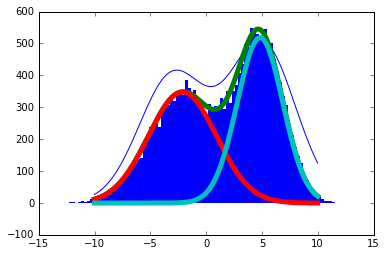

In [4]:
dane1 = np.random.normal(-2, 3, size=10000)
dane2 = np.random.normal(+5, 2, size=10000)
dane = np.append(dane1, dane2)
# def Gauss(x, Amplituda, Środek, Odchylenie, Stała):
#     return Amplituda*np.exp(-(x-Środek)**2/Odchylenie**2) + Stała

def dwa_gaussy(x, A1, S1, O1, A2, S2, O2, stała):
    return Gauss(x, A1, S1, O1, 0) + Gauss(x, A2, S2, O2, 0) + stała
parametry1 = 400, -3, 3
parametry2 = 500, 5, 3
stała = 0 
parametry_oszacowane = *parametry1, *parametry2, stała
print(*parametry_oszacowane)
x_fit = np.linspace(-10, 10, 1000)
y_oko = dwa_gaussy(x_fit, *parametry1, *parametry2, 0)

y, x = np.histogram(dane, bins=100)
x = x[:-1]


parametry_wszystkie, niepewnosci = curve_fit(dwa_gaussy, 
                                             x, y,
                                             p0 = parametry_oszacowane)

parametry_fit_1 = parametry_wszystkie[0:3]
parametry_fit_2 = parametry_wszystkie[3:6]
stała_fit = parametry_wszystkie[-1]

y_fit = dwa_gaussy(x_fit, *parametry_wszystkie)
# print(x_fit.shape)
dx = x[1]-x[0] #szerokość słupka
plt.bar(x,y, width = dx, linewidth=0)
plt.plot(x_fit, y_oko)
plt.plot(x_fit, y_fit, linewidth=5)
plt.plot(x_fit, Gauss(x_fit, *parametry_fit_1, stała_fit), linewidth=5)
plt.plot(x_fit, Gauss(x_fit, *parametry_fit_2, stała_fit), linewidth=5)
plt.show()